Welcome to my notebook entry for Space Titanic Competition.
I'll be going through the process of using binary classification, an attempt to learn more about Data Analysis.

This notebook is following the Complete Guide for this competition.

I'll be covering:
* Exploratory Data Analysis
* Feature Engineering
* Data Cleaning
* Encoding, Scaling and Preprocessing
* Training Machine Learning Models
* Cross Validation and Ensembling Predictions

# 1. Exploratory Data Analysis
- load data
- view sample data
- find shape of data
- view feature descriptions

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

print('Train df shape:', train_df.shape)
print('Test df shape:', test_df.shape)
train_df.info()

Train df shape: (8693, 14)
Test df shape: (4277, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


**Feature Descriptions:**
* PassengerId - Unique id for each passenger. Format: gggg_pp where gggg is the group of the passenger is travelling with and pp is the number that belongs to the individual within that group.
* HomePlanet - the planet the passenger departed from, typically planet of residence. 
* Cryosleep - indicates whether passenger is in this state, being frozen in time for the duration of the voyage. Passengers in this state are confined in their cabins.
* Cabin - the cabin number where the passenger is staying. Format: deck/num/side, where side is either P or S for port or starboard side.
* Destination - planned destination of the passenger. 
* Age - age of the passenger at the time of the voyage.
* VIP - whether the passenger has paid for VIP services for the duration of the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck  - Amount the passenger has been billed for the Ship's luxury amenities.
* Name - the first and last name of the passenger.
* Transported - whether the passenger has been transported to another dimension. This is the target. 

Now lets check for missing values in the dataset.

In [3]:
#the amount of missing values in each column of the training dataframe
print(train_df.isna().sum())
#the amount of missing valeus in each column of the test dataframe
print(test_df.isna().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [4]:
#lets check for the dataset information again
print("train dataset info: ", train_df.info())
print("training dataset uniques:", train_df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
train dataset info:  None
training dataset uniques: PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destin

This tells us that there are 6 continuous features (float64), 4 categorical features  and 3 descriptive/qualitative (object)

***EDA (Exploratory Data Analysis)***

Text(0.5, 1.0, 'Target distribution')

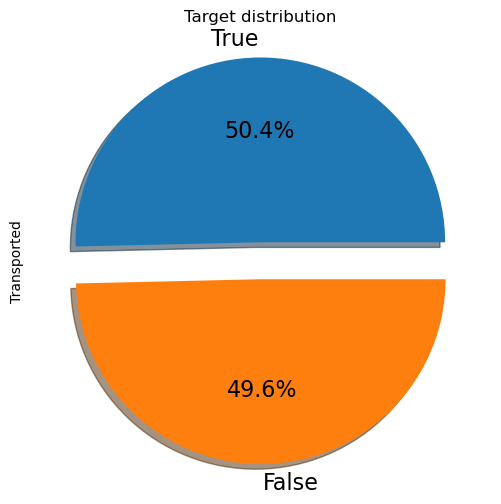

In [5]:
#set figure 
plt.figure(figsize=(6,6))

#Pie plot, take the value count of the Transported column
train_df['Transported'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Target distribution")

Continuous Features
- Age
- Expenditure Features

Text(0.5, 0, 'Age (Years)')

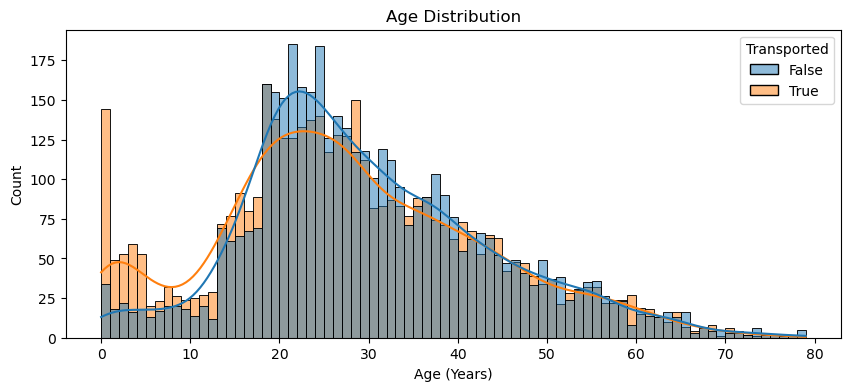

In [6]:
#figure size
plt.figure(figsize=(10,4))

#histogram
sns.histplot(data=train_df, x='Age', hue='Transported', binwidth=1, kde=True)

plt.title('Age Distribution')
plt.xlabel('Age (Years)')

Insights:
* 0-18 years old were more like to be transported to a different dimension than not
* 18 - 25 years old were less likely to be transported to a different dimension than not.
* passengers older than 25 years old were about equally likely to be transported to a different dimension than not.


Thought:
Create a new feature in feature engineering to indicate whether a passenger is a child, young adult, or adult.

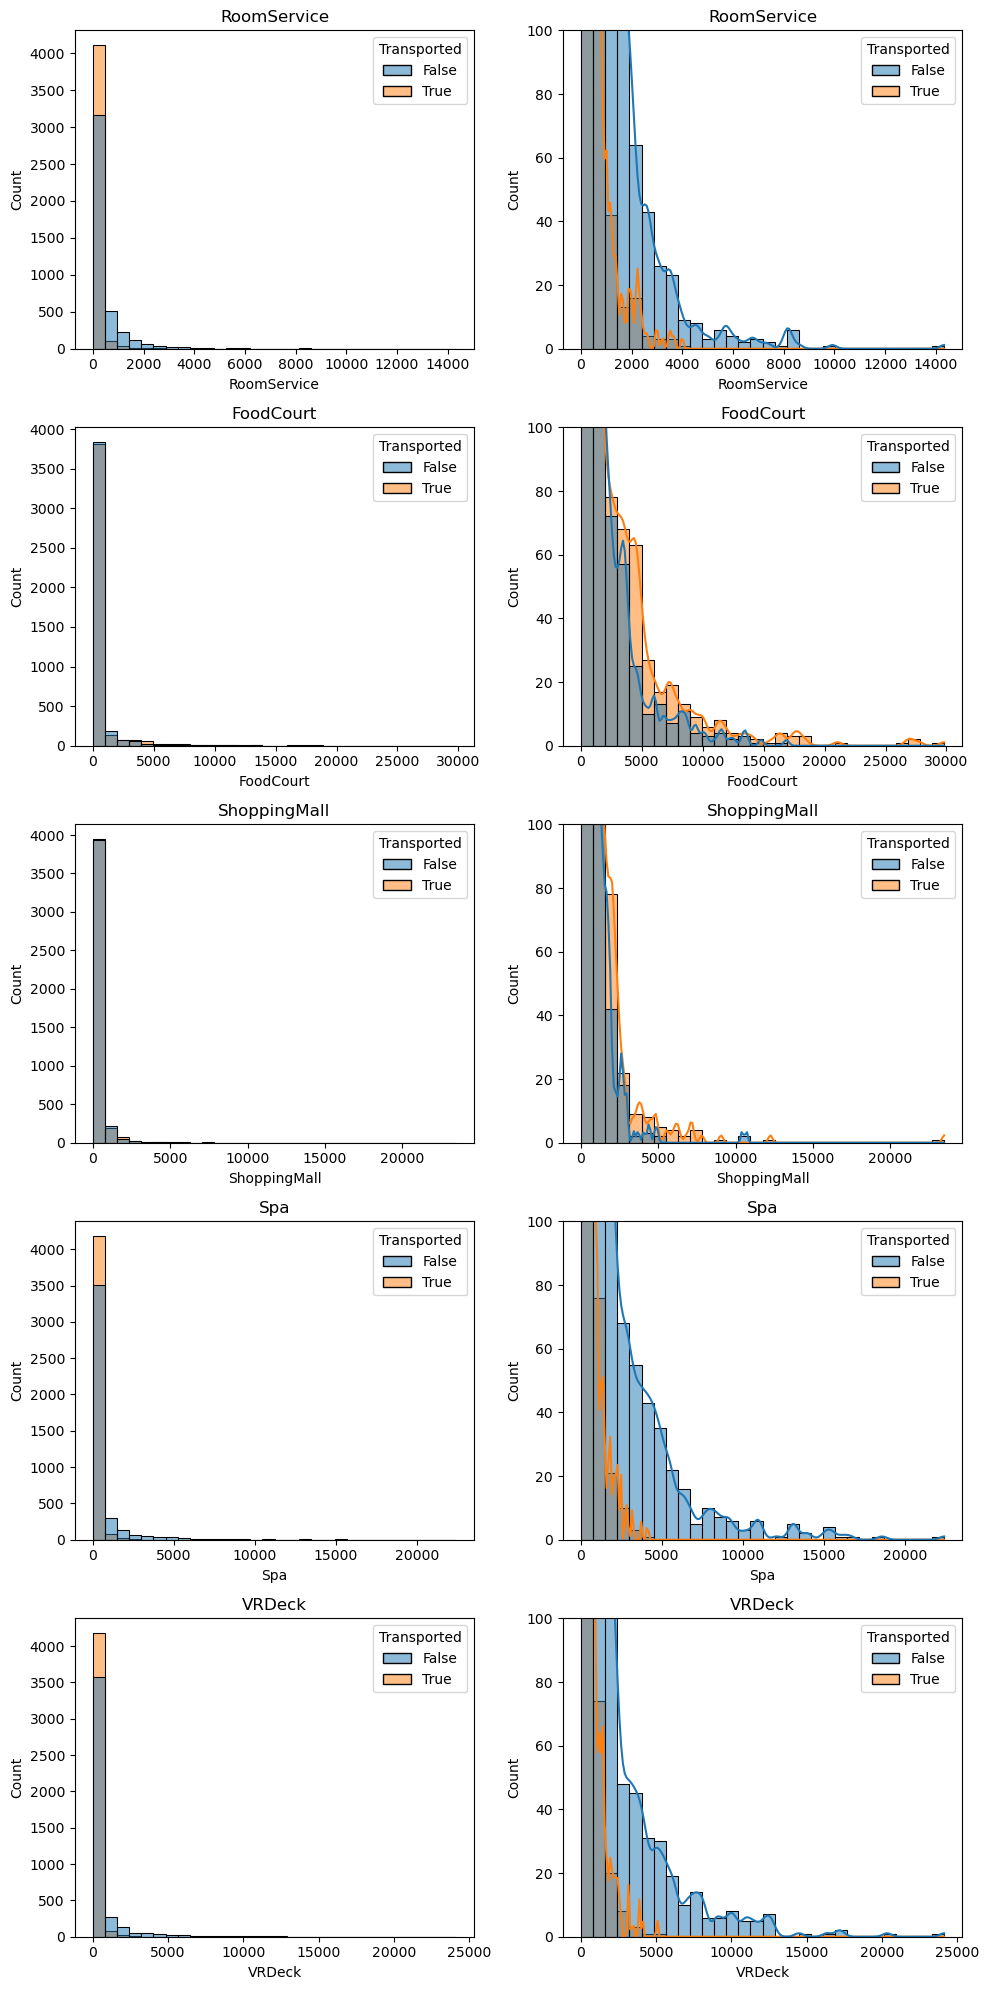

In [7]:
# Now onto expenditures
Exp_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

#plot expenditures features
fig = plt.figure(figsize=(10,20))
for i, var_name in enumerate(Exp_features):
    #left
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=train_df, x=var_name,axes=ax, bins=30, kde=False, hue='Transported')
    ax.set_title(var_name)
    
    
    #right
    ax = fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=train_df, x= var_name, axes=ax, bins=30,kde=True, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(var_name)
    
fig.tight_layout()
plt.show()

Notes:

* Most people dont spend any money on amenities
* People who were transported to a different dimension spend less.

Insight:
* Create a binary feature that tracks if the person has not spent anything at all. (0 total expenditure).

**Categorical features**

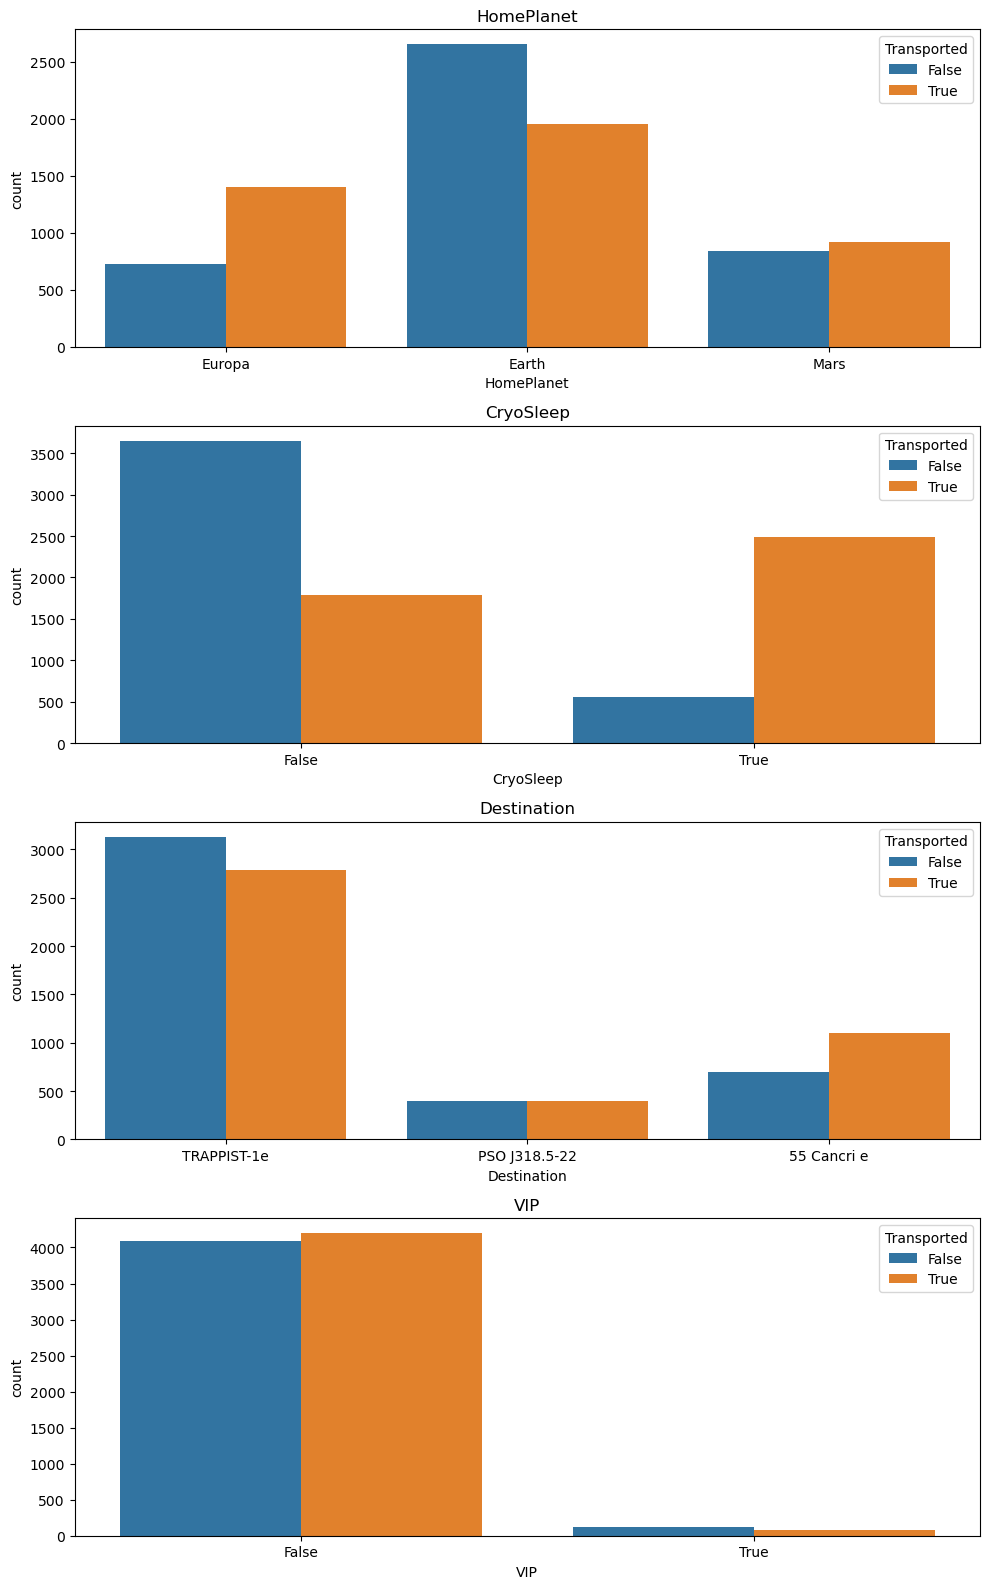

In [8]:
#Categorical features
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

#Plotting categoricals
fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(categorical_features):
    ax = fig.add_subplot(4,1,i+1)
    sns.countplot(data=train_df, x= var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)

fig.tight_layout()
plt.show()

Insights:
HomePlanet: if passenger's home planet is Europa, passenger is less likely to be transported. Whereas, home planet of Earth, passenger is more likely to be transported. Martians are not as indicative of being transported.
CryoSleep: passengers who were in cryosleep are less likely to be transported.
Destination: passengers heading to Trappist were less likely to be transported to a different dimension.
VIP: VIP status is not indicative whether passenger is more likely or less likely to be transported to a different dimension.

**Qualitative features**

In [9]:
#Qualitative features
Qualitative_Features =['PassengerId', 'Cabin', 'Name']

#preview
train_df[Qualitative_Features].head()

,PassengerId,Cabin,Name
0,0001_01,B/0/P,Maham Ofracculy
1,0002_01,F/0/S,Juanna Vines
2,0003_01,A/0/S,Altark Susent
3,0003_02,A/0/S,Solam Susent
4,0004_01,F/1/S,Willy Santantines


Insights:

- extract group and group size from PassengerId feature
- extract deck, numer,and side from cabin feature
- extract surname from name to identify families


# Feature Engineering

**Age Status**

Let's group the age into bins. This will help for filling missing values like expenditure by age.

Text(0.5, 1.0, 'Age Group Distribution')

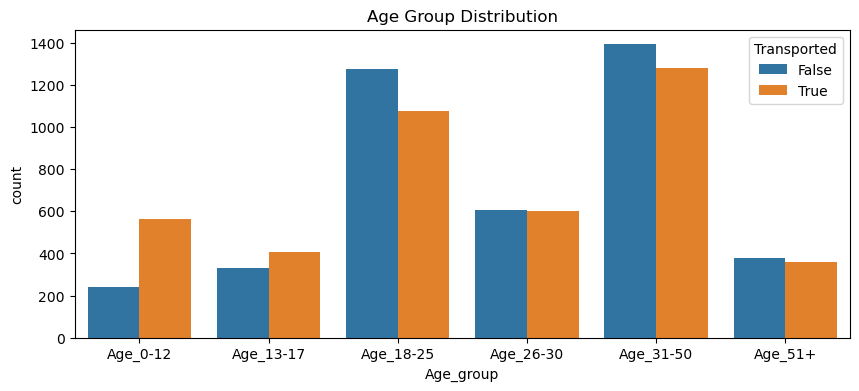

In [10]:
# New features - training set
train_df['Age_group']=np.nan
train_df.loc[train_df['Age']<=12,'Age_group']='Age_0-12'
train_df.loc[(train_df['Age']>12) & (train_df['Age']<18),'Age_group']='Age_13-17'
train_df.loc[(train_df['Age']>=18) & (train_df['Age']<=25),'Age_group']='Age_18-25'
train_df.loc[(train_df['Age']>25) & (train_df['Age']<=30),'Age_group']='Age_26-30'
train_df.loc[(train_df['Age']>30) & (train_df['Age']<=50),'Age_group']='Age_31-50'
train_df.loc[train_df['Age']>50,'Age_group']='Age_51+'

# New features - test set
test_df['Age_group']=np.nan
test_df.loc[test_df['Age']<=12,'Age_group']='Age_0-12'
test_df.loc[(test_df['Age']>12) & (test_df['Age']<18),'Age_group']='Age_13-17'
test_df.loc[(test_df['Age']>=18) & (test_df['Age']<=25),'Age_group']='Age_18-25'
test_df.loc[(test_df['Age']>25) & (test_df['Age']<=30),'Age_group']='Age_26-30'
test_df.loc[(test_df['Age']>30) & (test_df['Age']<=50),'Age_group']='Age_31-50'
test_df.loc[test_df['Age']>50,'Age_group']='Age_51+'


#plot the distribution
plt.figure(figsize=(10,4))
g = sns.countplot(data=train_df, x='Age_group', hue='Transported', order=['Age_0-12', 'Age_13-17', 'Age_18-25', 'Age_26-30','Age_31-50','Age_51+'])
plt.title('Age Group Distribution')

**Expenditure**

Calculate total expenditure and identify passengers with no expenditures

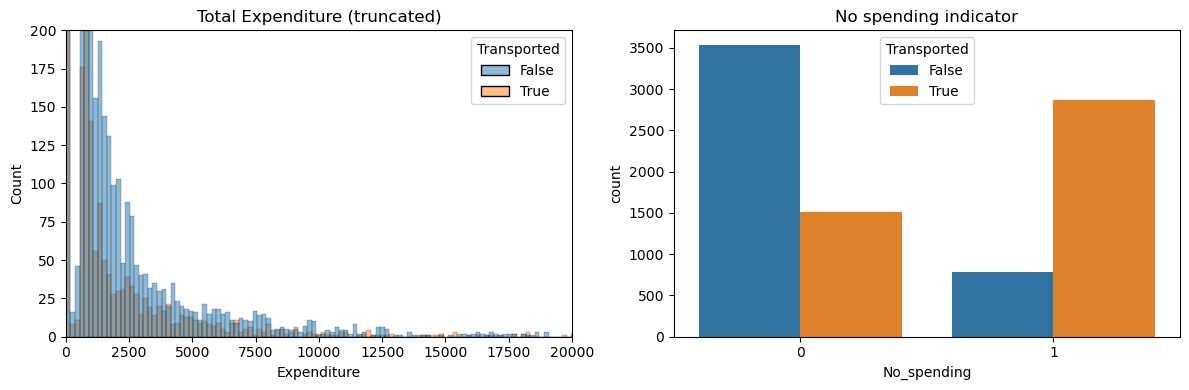

In [11]:
#training set

train_df['Expenditure']=train_df[Exp_features].sum(axis=1)
train_df['No_spending']=(train_df['Expenditure']==0).astype(int)

#test set

test_df['Expenditure']=test_df[Exp_features].sum(axis=1)
test_df['No_spending']=(test_df['Expenditure']==0).astype(int)


#plot
fig = plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data=train_df, x='Expenditure', hue='Transported', bins = 200)
plt.title('Total Expenditure (truncated)')
plt.ylim([0,200])
plt.xlim([0,20000])


plt.subplot(1,2,2)
sns.countplot(data=train_df, x='No_spending', hue='Transported')
plt.title('No spending indicator')
fig.tight_layout()

**Passenger Group**

Extract passenger group and group size from the PassengerId data.


False

/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


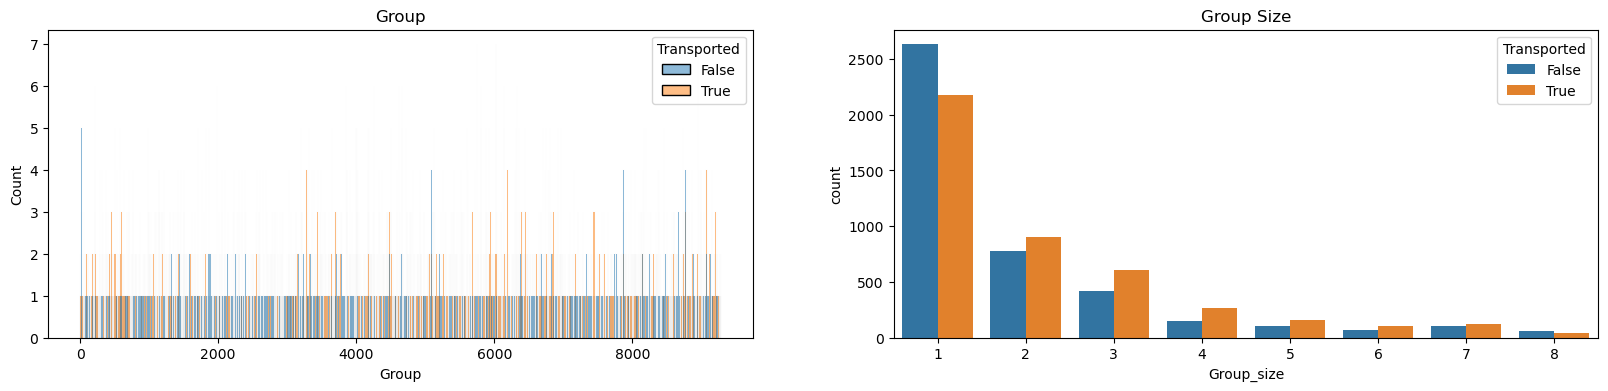

In [12]:
# New Feature - Group

train_df['Group'] = train_df['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
test_df['Group'] = test_df['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)

# new feature - Group Size
train_df['Group_size']=train_df['Group'].map(lambda x: pd.concat([train_df['Group'], test_df['Group']]).value_counts()[x])
test_df['Group_size']=test_df['Group'].map(lambda x: pd.concat([train_df['Group'], test_df['Group']]).value_counts()[x])

#plot distribution of the new features
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=train_df, x='Group', hue='Transported', binwidth=1)
plt.title('Group')

plt.subplot(1,2,2)
sns.countplot(data=train_df, x = 'Group_size', hue='Transported')
plt.title('Group Size')
fig.get_tight_layout()

Since the cardinality of the group feature is too big (6217), the number of dimensions would explode with just one-hot encoding, therefore we can use it.

On the other hand, the group size is a useful feature. We can compress the feature by creating a 'Solo' column that tracks whether someone is traveling on their own or not. The figure on the right shows that group size = 1 is less likely to be transported than groups larger than size 1.

(0.0, 3000.0)

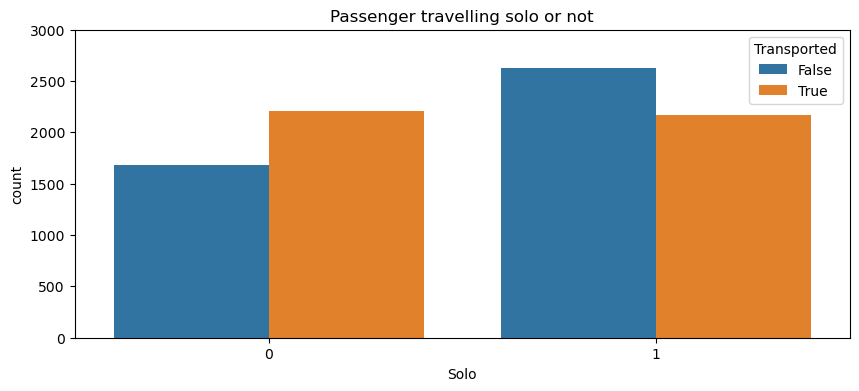

In [13]:
# new feature
train_df['Solo'] = (train_df['Group_size']==1).astype(int)
test_df['Solo'] = (test_df['Group_size']==1).astype(int)

#new feature distribution
plt.figure(figsize=(10,4))
sns.countplot(data=train_df, x ='Solo', hue='Transported')
plt.title('Passenger travelling solo or not')
plt.ylim([0,3000])

**Cabin Location**

does the cabin location play any part?


False

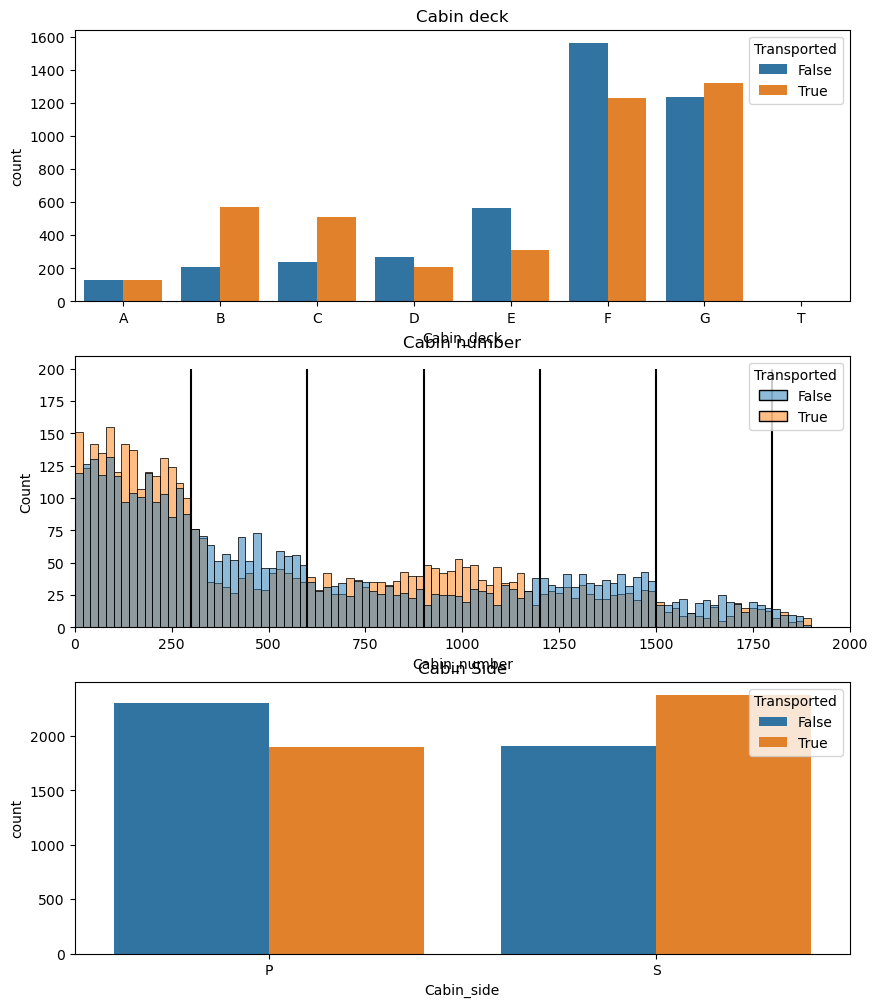

In [14]:
# Replace NaN's with outliers for now (to split feature)
train_df['Cabin'].fillna('Z/9999/Z', inplace=True)
test_df['Cabin'].fillna('Z/9999/Z', inplace=True)


# new features - training set
train_df['Cabin_deck'] = train_df['Cabin'].apply(lambda x: x.split('/')[0])
train_df['Cabin_number'] = train_df['Cabin'].apply(lambda x:x.split('/')[1]).astype(int)
train_df['Cabin_side'] = train_df['Cabin'].apply(lambda x: x.split('/')[2])

# new features - test set
test_df['Cabin_deck'] = test_df['Cabin'].apply(lambda x: x.split('/')[0])
test_df['Cabin_number'] = test_df['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
test_df['Cabin_side'] = test_df['Cabin'].apply(lambda x: x.split('/')[2])

# put NaN's back in (to fill later)
train_df.loc[train_df['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
train_df.loc[train_df['Cabin_number']==9999, 'Cabin_number']=np.nan
train_df.loc[train_df['Cabin_side']=='Z', 'Cabin_side']=np.nan
test_df.loc[test_df['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
test_df.loc[test_df['Cabin_number']==9999, 'Cabin_number']=np.nan
test_df.loc[test_df['Cabin_side']=='Z', 'Cabin_side']=np.nan


#drop cabin since we dont need anymore
train_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

#plot the distribution of new features
fig=plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
sns.countplot(data=train_df, x='Cabin_deck', hue='Transported', order=['A','B','C','D','E','F','G','T'])
plt.title('Cabin deck')

plt.subplot(3,1,2)
sns.histplot(data=train_df, x = 'Cabin_number', hue='Transported', binwidth=20)
plt.vlines(300, ymin=0, ymax=200, color='black')
plt.vlines(600, ymin=0, ymax=200, color='black')
plt.vlines(900, ymin=0, ymax=200, color='black')
plt.vlines(1200, ymin=0, ymax=200, color='black')
plt.vlines(1500, ymin=0, ymax=200, color='black')
plt.vlines(1800, ymin=0, ymax=200, color='black')
plt.title('Cabin number')
plt.xlim([0,2000])

plt.subplot(3,1,3)
sns.countplot(data=train_df, x='Cabin_side', hue='Transported')
plt.title('Cabin Side')
fig.get_tight_layout()

Cabin number is grouped into chunks of 300 cabins. We can compress this feature into a categorical feature which would indicate which passenger is in.



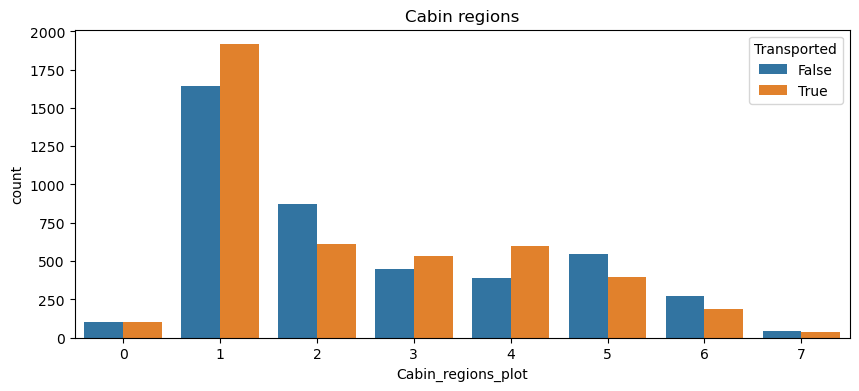

In [15]:
#new features - training set
train_df['Cabin_region1']=(train_df['Cabin_number']< 300).astype(int)
#one -hot encoding
train_df['Cabin_region2']=((train_df['Cabin_number']>= 300) & (train_df['Cabin_number']<600)).astype(int)
train_df['Cabin_region3']=((train_df['Cabin_number']>= 600) & (train_df['Cabin_number']<900)).astype(int)
train_df['Cabin_region4']=((train_df['Cabin_number']>= 900) & (train_df['Cabin_number']<1200)).astype(int)
train_df['Cabin_region5']=((train_df['Cabin_number']>= 1200) & (train_df['Cabin_number']<1500)).astype(int)
train_df['Cabin_region6']=((train_df['Cabin_number']>= 1500) & (train_df['Cabin_number']<1800)).astype(int)
train_df['Cabin_region7']=(train_df['Cabin_number']>= 1800).astype(int)
                           
                           
#new features - test set
test_df['Cabin_region1']=(test_df['Cabin_number']< 300).astype(int)
test_df['Cabin_region2']=((test_df['Cabin_number']>= 300) & (test_df['Cabin_number']<600)).astype(int)
test_df['Cabin_region3']=((test_df['Cabin_number']>= 600) & (test_df['Cabin_number']<900)).astype(int)
test_df['Cabin_region4']=((test_df['Cabin_number']>= 900) & (test_df['Cabin_number']<1200)).astype(int)
test_df['Cabin_region5']=((test_df['Cabin_number']>= 1200) & (test_df['Cabin_number']<1500)).astype(int)
test_df['Cabin_region6']=((test_df['Cabin_number']>= 1500) & (test_df['Cabin_number']<1800)).astype(int)
test_df['Cabin_region7']=(test_df['Cabin_number']>= 1800).astype(int)
                               
                          
#plot distribution of new features
plt.figure(figsize=(10,4))
train_df['Cabin_regions_plot'] = (train_df['Cabin_region1']+2*train_df['Cabin_region2']+ 3*train_df['Cabin_region3'] + 4*train_df['Cabin_region4'] + 5* train_df['Cabin_region5'] + 6*train_df['Cabin_region6']+ 7 *train_df['Cabin_region7']).astype(int)
sns.countplot(data=train_df, x ='Cabin_regions_plot', hue='Transported')
plt.title('Cabin regions')
train_df.drop('Cabin_regions_plot', axis=1,inplace=True)

**Last name**

Calculate family size from the last name so we can group people. 


Text(0.5, 1.0, 'Family Size')

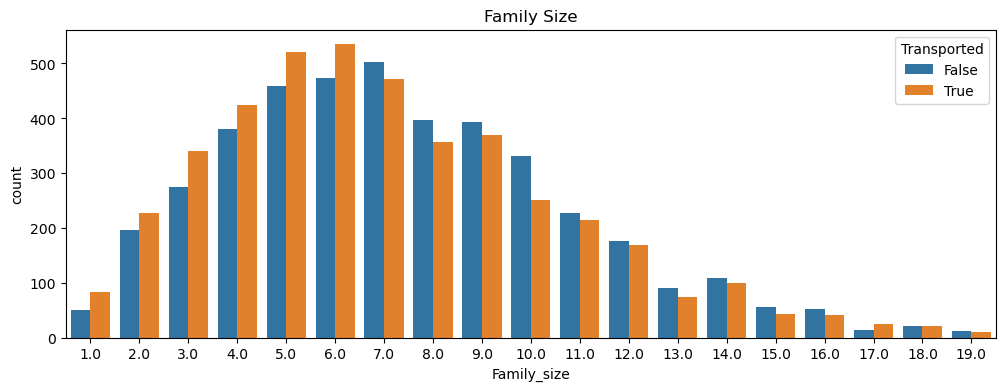

In [16]:
# replace NaN's with outliers for (split feature later)
train_df['Name'].fillna('Unknown Unknown', inplace=True)
test_df['Name'].fillna('Unknown Unknown', inplace=True)

# new feature - Surname
train_df['Surname']= train_df['Name'].str.split().str[-1]
test_df['Surname'] = test_df['Name'].str.split().str[-1]

# new feature - family size
train_df['Family_size'] = train_df['Surname'].map(lambda x: pd.concat([train_df['Surname'], test_df['Surname']]).value_counts()[x])
test_df['Family_size'] = test_df['Surname'].map(lambda x: pd.concat([train_df['Surname'], test_df['Surname']]).value_counts()[x])

# put NaN's back in (to be filled later)
train_df.loc[train_df['Surname']=='Unknown', 'Surname']=np.nan
train_df.loc[train_df['Family_size']>100, 'Family_size']= np.nan
test_df.loc[test_df['Surname']=='Unknown', 'Surname']=np.nan
test_df.loc[test_df['Family_size']>100, 'Family_size']=np.nan

# drop name since we dont need it anymore
train_df.drop('Name', axis=1,inplace=True)
test_df.drop('Name', axis=1, inplace=True)

#new feature distribution
plt.figure(figsize=(12,4))
sns.countplot(data=train_df, x='Family_size', hue='Transported')
plt.title('Family Size')

# Missing Values

**Combine train and test dataframes**

This should make it easier to fill the missing values. We can split them back later.


In [17]:
# labels and features
y= train_df['Transported'].copy().astype(int)
X=train_df.drop('Transported', axis=1).copy()

#concatenate dataframes
data = pd.concat([X, test_df], axis=0).reset_index(drop=True)

**Let's explore the missing values**

In [18]:
# Columns with missing values
na_cols = data.columns[data.isna().any()].tolist()

#missing values summary
mv = pd.DataFrame(data[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(data),2)
mv

,Number_missing,Percentage_missing
HomePlanet,288,2.22
CryoSleep,310,2.39
Destination,274,2.11
Age,270,2.08
VIP,296,2.28
RoomService,263,2.03
FoodCourt,289,2.23
ShoppingMall,306,2.36
Spa,284,2.19
VRDeck,268,2.07


That's a lot of missing values!

let's create a heatmap to further investigate how pervalent this is.

Text(0.5, 1.0, 'Heatmap of missing values')

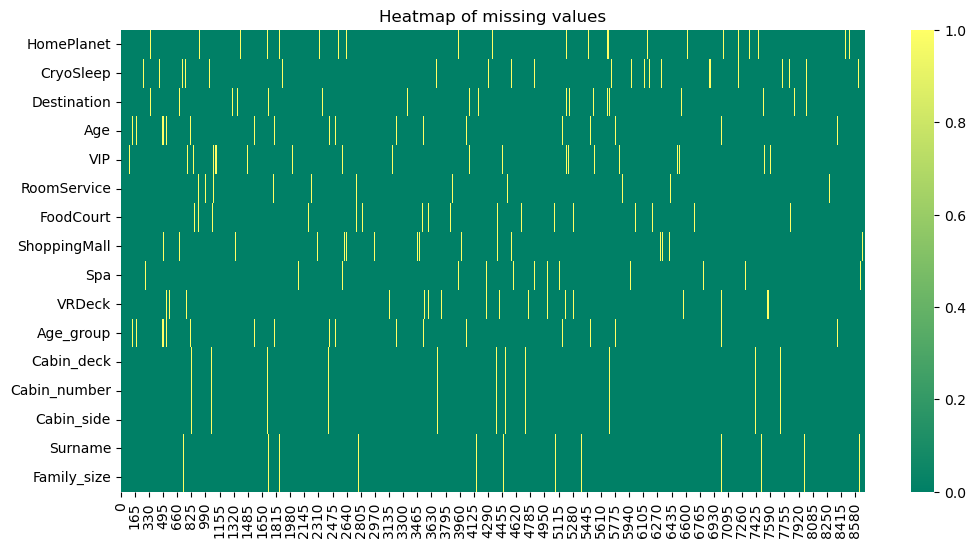

In [19]:
#heatmap of missing values
plt.figure(figsize=(12,6))
sns.heatmap(train_df[na_cols].isna().T, cmap='summer')
plt.title('Heatmap of missing values')


While we said earlier that there's a lot of missing values, they only make up about 2% of the data. This is relatively small and for the most part, they don't seem to be happening at the same time. Let's inspect closer.

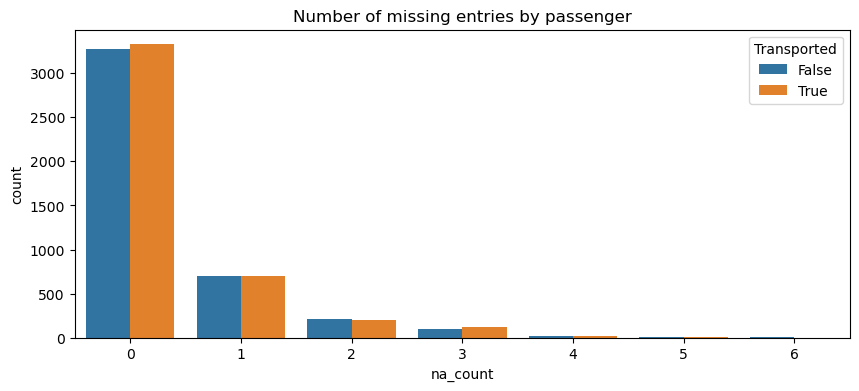

In [20]:
#count plot of number of missing vales by passenger
train_df['na_count'] = train_df.isna().sum(axis=1)
plt.figure(figsize=(10,4))
sns.countplot(data=train_df, x='na_count', hue='Transported')
plt.title('Number of missing entries by passenger')
train_df.drop('na_count', axis=1, inplace=True)

* Missing values are independent of the target and are isolated for the most part  (doesnt affect transported values)
* Even though only 2% of the data is missing, about 25% of all passengers have at least 1 missing value.
* PassengerId is the only feature to not have any missing values

Insighs
* since most of the missing values are isolated, it makes sense to fill them rather than dropping the rows
* if there's a relationship between PassengerId and other features, we can fill missing values according to this column.

**Strategy**

The easiest way to deal with missing values is to just use the median for continouos features and the mode for categorical features. This will work okay but if we want to maximise the accuracy of our models, then we need to look for patterns within the missing data.

**HomePlanet and Group**

In [21]:
# Joint distribution of Group and HomePlanet
GHP_gb=data.groupby(['Group','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
GHP_gb.head()

HomePlanet,Earth,Europa,Mars
Group,,,
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,2.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0


Nice! this shows that everyone in the same group comes from the same home planet. So we can fill the missing HomePlanet values according to the group. 

In [22]:
# Missing values before
HP_bef=data['HomePlanet'].isna().sum()

# Passengers with missing HomePlanet and in a group with known HomePlanet
GHP_index=data[data['HomePlanet'].isna()][(data[data['HomePlanet'].isna()]['Group']).isin(GHP_gb.index)].index

# Fill corresponding missing values
data.loc[GHP_index,'HomePlanet']=data.iloc[GHP_index,:]['Group'].map(lambda x: GHP_gb.idxmax(axis=1)[x])

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 288
#HomePlanet missing values after: 157


We managed to fill 131 Values with 100% confidence. Nice!

**HomePlanet and CabinDeck****

<Axes: xlabel='Cabin_deck', ylabel='HomePlanet'>

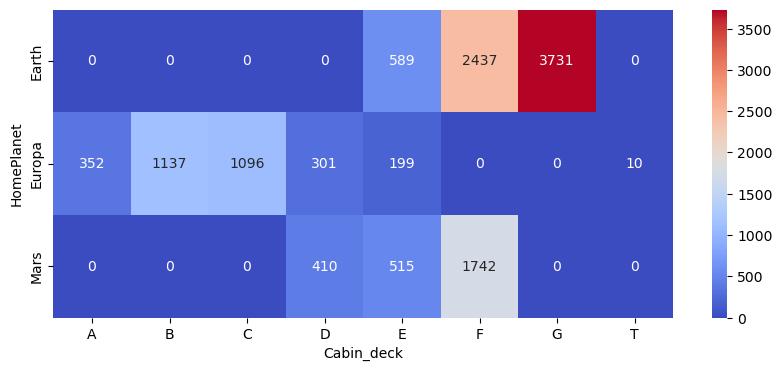

In [23]:
# Joint distribution of CabinDeck and HomePlanet

CDHP_gb = data.groupby(['Cabin_deck','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

#heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(CDHP_gb.T, annot=True, fmt='g', cmap='coolwarm')

* All Passengers on decks A,B,C, or T came from Europa
* All Passengers on deck G came from Earth
* Passengers on decks D,E or F came from multiple planets

In [24]:
# missing values before
HP_bef=data['HomePlanet'].isna().sum()

#Decks A, B, C, or T came from  Europa
data.loc[(data['HomePlanet'].isna()) & (data['Cabin_deck'].isin(['A','B','C','T'])), 'HomePlanet']= 'Europa'

#Deck G came from Earth
data.loc[(data['HomePlanet'].isna()) & (data['Cabin_deck'].isin(['G'])), 'HomePlanet']= 'Earth'


#print number of missing values left
print('#HomePlanet missing values before:', HP_bef)
print('#HomePlanet missing values after:', data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 157
#HomePlanet missing values after: 94


**Now let's try HomePlanet and Surname**

Text(0.5, 1.0, 'Number of unique planets per surname')

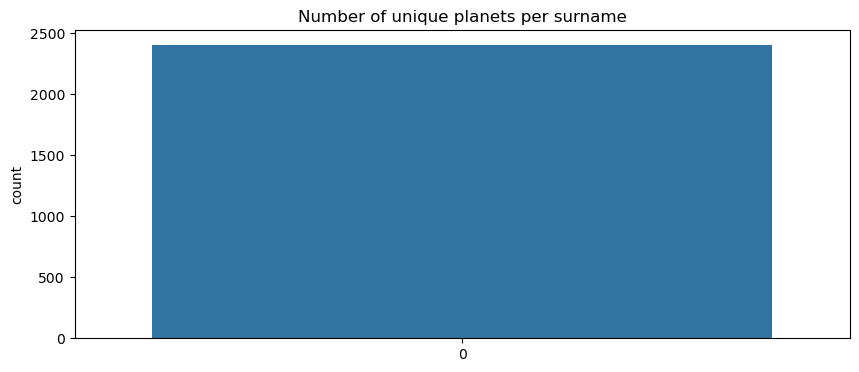

In [25]:
# Joint distribution of Surname and HomePlanet
SHP_gb = data.groupby(['Surname', 'HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

# Countplot of unique values
plt.figure(figsize=(10,4))
sns.countplot((SHP_gb>0).sum(axis=1))
plt.title('Number of unique planets per surname')

Great! this proves that everyone with the same surname comes from the same home planet.

In [26]:
# Missing values before
HP_bef = data['HomePlanet'].isna().sum()

# passengers with missing HomePlanet and in a family with known HomePlanet
SHP_index = data[data['HomePlanet'].isna()][(data[data['HomePlanet'].isna()]['Surname']).isin(SHP_gb.index)].index

#Fill corresponding missing values
data.loc[SHP_index, 'HomePlanet']=data.iloc[SHP_index,:]['Surname'].map(lambda x: SHP_gb.idxmax(axis=1)[x])

# print number of missing values left
print('#HomePlanet missing values before:', HP_bef)
print('#HomePlanet missing values after:', data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 94
#HomePlanet missing values after: 10


10 missing values left!

In [27]:
data[data['HomePlanet'].isna()][['PassengerId', 'HomePlanet','Destination']]

,PassengerId,HomePlanet,Destination
2274,2443_01,NaN,TRAPPIST-1e
2631,2817_01,NaN,TRAPPIST-1e
3091,3331_01,NaN,TRAPPIST-1e
4548,4840_01,NaN,TRAPPIST-1e
5762,6108_01,NaN,TRAPPIST-1e
8969,0616_01,NaN,TRAPPIST-1e
10583,4052_01,NaN,TRAPPIST-1e
11913,7065_01,NaN,TRAPPIST-1e
12551,8435_01,NaN,TRAPPIST-1e
12725,8775_01,NaN,TRAPPIST-1e


Everyone in the list is heading to Trappist-1e. Perhaps we should check out HomePlanet and Destination

<Axes: xlabel='HomePlanet', ylabel='Destination'>

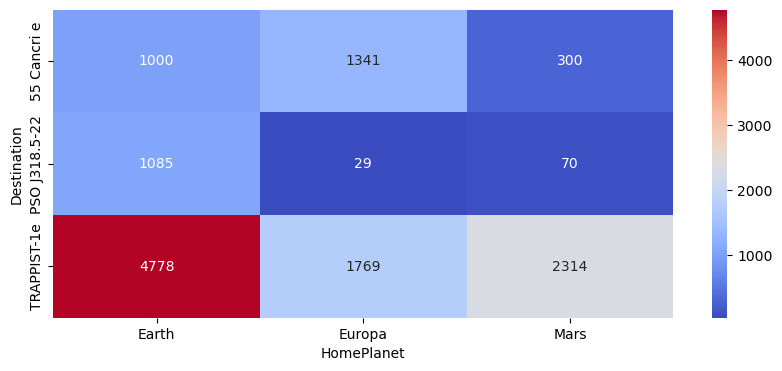

In [28]:
# Joint distribution of HomePlanet and Destination
HPD_gb = data.groupby(['HomePlanet', 'Destination'])['Destination'].size().unstack().fillna(0)

# heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(HPD_gb.T, annot=True, fmt='g', cmap='coolwarm')

Most people heading to Trappist-1e came from Earth so it makes sense to guess that these 10 people came from there. But from earlier, no one on deck D came from Earth so we cannot say that they came from Earth.

In [29]:
# missing values before
HP_bef = data['HomePlanet'].isna().sum()

# Fill remaining HomePlanet missing values with Earth ( if not on deck D) or Mars( if on Deck D)
data.loc[(data['HomePlanet'].isna()) & ~(data['Cabin_deck']=='D'), 'HomePlanet'] = 'Earth'
data.loc[(data['HomePlanet'].isna()) & (data['Cabin_deck']=='D'), 'HomePlanet'] = 'Mars'

#Print number of missing values left
print('#HomePlanet missing values before:', HP_bef)
print('#HomePlanet missing values after:', data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 10
#HomePlanet missing values after: 0


Yes! we're done with HomePlanet


Let's go for the destination feature next.

Since the majority (68%) of passengers are heading towards Trappist-1e, we'll just impute this value.

In [30]:
# missing values before
D_bef = data['Destination'].isna().sum()

# Fill missing Destination values with mode
data.loc[(data['Destination'].isna()), 'Destination']="TRAPPIST-1e"

# print number of missing values left
print('#Destination missing vlaues before:', D_bef)
print('#Destination missing values after:', data['Destination'].isna().sum())

#Destination missing vlaues before: 274
#Destination missing values after: 0


**Surname and group**

The reason we are filling missing surnames is because we will use surnames later to fill missing values for other features. It also means we can improve the accuracy of the family size feature.

In [31]:
# Joint distribution of Group and Surname
GSN_gb=data[data['Group_size']>1].groupby(['Group','Surname'])['Surname'].size().unstack().fillna(0)

# # Countplot of unique values
# plt.figure(figsize=(10,4))
# sns.countplot((GSN_gb>0).sum(axis=1))
# plt.title('Number of unique surnames by group')

The majority (83%) of groups contain only 1 family. Let's fill missing surnames according to the majority surname in that group.

In [32]:
# missing values before
SN_bef = data['Surname'].isna().sum()

# Passengers with missing Surname and in a group with known majority Surname
GSN_index = data[data['Surname'].isna()][(data[data['Surname'].isna()]['Group']).isin(GSN_gb.index)].index


# Fill corresponding missing values
data.loc[GSN_index, 'Surname'] = data.iloc[GSN_index,: ]['Group'].map(lambda x: GSN_gb.idxmax(axis=1)[x])


# print number of missing values left
print('#Destination missing vlaues before:', SN_bef)
print('#Destination missing values after:', data['Surname'].isna().sum())

#Destination missing vlaues before: 294
#Destination missing values after: 155


We don't have to get rid of all the missing values. In the end, we will be dropping off the surname features anyway. However, we can update the family size feature.

In [33]:
# replace NaN's with outliers so we can use map
data['Surname'].fillna('Unknown', inplace=True)

# Update family size feature
data['Family_size'] = data['Surname'].map(lambda x: data['Surname'].value_counts()[x])

# put NaN's back in place of outliers
data.loc[data['Surname']=='Unknown','Surname']=np.nan

# unknown surname means no family
data.loc[data['Family_size']>100, 'Family_size']=0

**CabinSide and group**

In [34]:
# Joint distribution of Group and Cabin features
GCD_gb=data[data['Group_size']>1].groupby(['Group','Cabin_deck'])['Cabin_deck'].size().unstack().fillna(0)
GCN_gb=data[data['Group_size']>1].groupby(['Group','Cabin_number'])['Cabin_number'].size().unstack().fillna(0)
GCS_gb=data[data['Group_size']>1].groupby(['Group','Cabin_side'])['Cabin_side'].size().unstack().fillna(0)

# Countplots
# fig=plt.figure(figsize=(16,4))
# plt.subplot(1,3,1)
# # sns.countplot((GCD_gb>0).sum(axis=1))
# plt.title('#Unique cabin decks per group')

# plt.subplot(1,3,2)
# # sns.countplot((GCN_gb>0).sum(axis=1))
# plt.title('#Unique cabin numbers per group')

# plt.subplot(1,3,3)
# # sns.countplot((GCS_gb>0).sum(axis=1))
# plt.title('#Unique cabin sides per group')
# fig.tight_layout()


Everyone in the same group is also on the same cabin side. For cabin deck and cabin number there is also a fairly good correlation with group.

In [35]:
# Missing values before
CS_bef=data['Cabin_side'].isna().sum()

# Passengers with missing Cabin side and in a group with known Cabin side
GCS_index=data[data['Cabin_side'].isna()][(data[data['Cabin_side'].isna()]['Group']).isin(GCS_gb.index)].index

# Fill corresponding missing values
data.loc[GCS_index,'Cabin_side']=data.iloc[GCS_index,:]['Group'].map(lambda x: GCS_gb.idxmax(axis=1)[x])

# Print number of missing values left
print('#Cabin_side missing values before:',CS_bef)
print('#Cabin_side missing values after:',data['Cabin_side'].isna().sum())

#Cabin_side missing values before: 299
#Cabin_side missing values after: 162


**CabinSide and Surname**

Text(0.5, 1.0, 'Ratio of cabin side by surname')

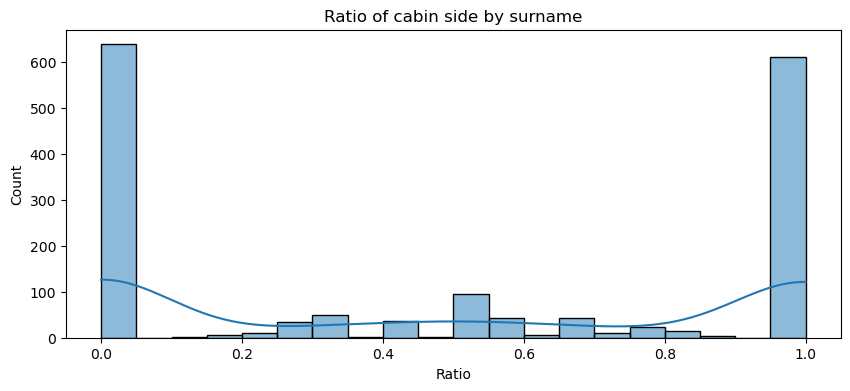

In [36]:
# Joint distribution of Surname and Cabin side
SCS_gb = data[data['Group_size']>1].groupby(['Surname', 'Cabin_side'])['Cabin_side'].size().unstack().fillna(0)

# ratio of sides
SCS_gb['Ratio']=SCS_gb['P']/(SCS_gb['P']+ SCS_gb['S'])

# histogram of ratio
plt.figure(figsize=(10,4))
sns.histplot(SCS_gb['Ratio'], kde=True, binwidth=0.05)
plt.title('Ratio of cabin side by surname')

In [37]:
# print proportion
print('Percentage of families all on the same cabin side:', 100*np.round((SCS_gb['Ratio'].isin([0,1])).sum()/len(SCS_gb),3), '%')


# another view of the same information
SCS_gb.head()

Percentage of families all on the same cabin side: 76.7 %


Cabin_side,P,S,Ratio
Surname,,,
Acobson,0.0,3.0,0.0
Acobsond,3.0,0.0,1.0
Adavisons,6.0,0.0,1.0
Admingried,0.0,4.0,0.0
Aginge,3.0,0.0,1.0


This shows that families tend to be on the same cabin side. 77% of families are entirely on the same side.

In [38]:
# missing values before
CS_bef = data['Cabin_side'].isna().sum()

# drop ratio column
SCS_gb.drop('Ratio', axis=1, inplace=True)

# Passengers with missing Cabin side and in a family with known Cabin side
SCS_index = data[data['Cabin_side'].isna()][(data[data['Cabin_side'].isna()]['Surname']).isin(SCS_gb.index)].index

# Fill corresponding missing values
data.loc[SCS_index,'Cabin_side']=data.iloc[SCS_index,:]['Surname'].map(lambda x: SCS_gb.idxmax(axis=1)[x])

# drop surname, we dont need it anymore
data.drop('Surname', axis=1, inplace=True)

#print number of missingg values left
print('#Cabin_side missing valeus before:', CS_bef)
print('#Cabin_side missing valeus after:', data['Cabin_side'].isna().sum())

#Cabin_side missing valeus before: 162
#Cabin_side missing valeus after: 66


The remaining missing values will be replaced with an outlier. This is because we really dont know which one of the two sides we should assign.

In [39]:
# Value counts
data['Cabin_side'].value_counts()

S    6504
P    6400
Name: Cabin_side, dtype: int64

In [40]:
# Missing values before
CS_bef=data['Cabin_side'].isna().sum()

# Fill remaining missing values with outlier
data.loc[data['Cabin_side'].isna(),'Cabin_side']='Z'

# Print number of missing values left
print('#Cabin_side missing values before:',CS_bef)
print('#Cabin_side missing values after:',data['Cabin_side'].isna().sum())

#Cabin_side missing values before: 66
#Cabin_side missing values after: 0


**CabinDeck and Group**

remember that groups tend to be on the same cabin deck.

In [41]:
# missing values before
CD_bef=data['Cabin_deck'].isna().sum()

# Passengers with missing Cabin deck and in a group with known majority Cabin deck
GCD_index=data[data['Cabin_deck'].isna()][(data[data['Cabin_deck'].isna()]['Group']).isin(GCD_gb.index)].index

# Fill corresponding missing values
data.loc[GCD_index,'Cabin_deck']=data.iloc[GCD_index,:]['Group'].map(lambda x: GCD_gb.idxmax(axis=1)[x])

#print number of missingg values left
print('#Cabin_side missing valeus before:', CD_bef)
print('#Cabin_side missing valeus after:', data['Cabin_side'].isna().sum())

#Cabin_side missing valeus before: 299
#Cabin_side missing valeus after: 0


CabinDeck and HomePlanet

In [42]:
# Joint distribution
data.groupby(['HomePlanet','Destination','Solo','Cabin_deck'])['Cabin_deck'].size().unstack().fillna(0)

Cabin_deck                         A      B      C      D      E       F  \
HomePlanet Destination   Solo                                              
Earth      55 Cancri e   0       0.0    0.0    0.0    0.0   20.0    90.0   
                         1       0.0    0.0    0.0    0.0   47.0   289.0   
           PSO J318.5-22 0       0.0    0.0    0.0    0.0   18.0    67.0   
                         1       0.0    0.0    0.0    0.0   25.0   262.0   
           TRAPPIST-1e   0       0.0    0.0    0.0    0.0  133.0   438.0   
                         1       0.0    0.0    0.0    0.0  358.0  1350.0   
Europa     55 Cancri e   0      96.0  377.0  313.0   59.0   35.0     0.0   
                         1      67.0  141.0  159.0   46.0   34.0     0.0   
           PSO J318.5-22 0       2.0    5.0   11.0    0.0    0.0     0.0   
                         1       0.0    0.0   10.0    0.0    0.0     0.0   
           TRAPPIST-1e   0     152.0  459.0  428.0  120.0   53.0     0.0   
                         1      44.0  179.0  201.0   84.0   82.0     0.0   
Mars       55 Cancri e   0       0.0    0.0    0.0   32.0   15.0   104.0   
                         1       0.0    0.0    0.0   40.0   16.0    92.0   
           PSO J318.5-22 0       0.0    0.0    0.0    8.0    9.0    14.0   
                         1       0.0    0.0    0.0    9.0    7.0    21.0   
           TRAPPIST-1e   0       0.0    0.0    0.0  168.0  219.0   798.0   
                         1       0.0    0.0    0.0  164.0  263.0   743.0   

Cabin_deck                          G    T  
HomePlanet Destination   Solo               
Earth      55 Cancri e   0      272.0  0.0  
                         1      269.0  0.0  
           PSO J318.5-22 0      230.0  0.0  
                         1      466.0  0.0  
           TRAPPIST-1e   0     1075.0  0.0  
                         1     1509.0  0.0  
Europa     55 Cancri e   0        0.0  2.0  
                         1        0.0  0.0  
           PSO J318.5-22 0        0.0  0.0  
                         1        0.0  0.0  
           TRAPPIST-1e   0        0.0  1.0  
                         1        0.0  8.0  
Mars       55 Cancri e   0        0.0  0.0  
                         1        0.0  0.0  
           PSO J318.5-22 0        0.0  0.0  
                         1        0.0  0.0  
           TRAPPIST-1e   0        0.0  0.0  
                         1        0.0  0.0

Notes:
*  passengers from Mars are most likely in deck F.
*  Passengers from Europa are most likely in Deck C if travelling solo and deck B otherwise.
*  Passenger from Earth are mostlikely in deck G.


We will fill in missing values according to where the mode appears in this subgroups.

In [43]:
# Missing values before
CD_bef=data['Cabin_deck'].isna().sum()

# Fill missing values using the mode
na_rows_CD=data.loc[data['Cabin_deck'].isna(),'Cabin_deck'].index
data.loc[data['Cabin_deck'].isna(),'Cabin_deck']=data.groupby(['HomePlanet','Destination','Solo'])['Cabin_deck'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_CD]

# Print number of missing values left
print('#Cabin_deck missing values before:',CD_bef)
print('#Cabin_deck missing values after:',data['Cabin_deck'].isna().sum())


#Cabin_deck missing values before: 162
#Cabin_deck missing values after: 0


CabinNumber and CabinDeck

Text(0.5, 1.0, 'Cabin_number vs group coloured by group')

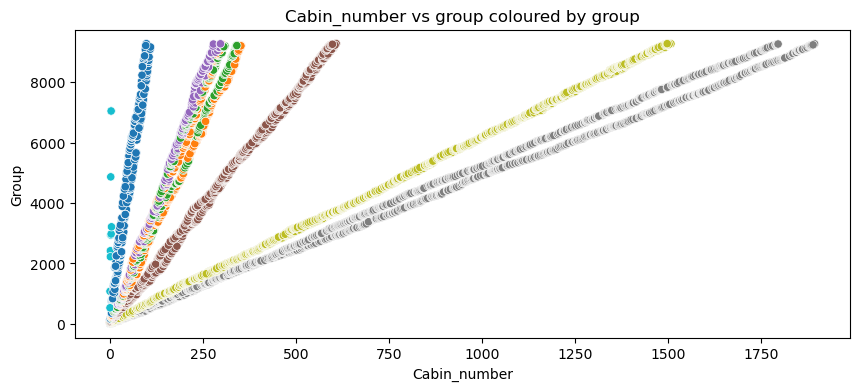

In [44]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
# Scatterplot
plt.figure(figsize=(10,4))
sns.scatterplot(x=data['Cabin_number'], y=data['Group'], c=LabelEncoder().fit_transform(data.loc[~data['Cabin_number'].isna(),'Cabin_deck']), cmap='tab10')
plt.title('Cabin_number vs group coloured by group')

Interesting pattern!
Cabin_number and group_number share a linear relationship on a deck by deck basis. Let's extrapolate the missing cabin numbers using linear regression on a deck by deck basis to get an approximate cabin number.

In [45]:
from sklearn.linear_model import LinearRegression, LogisticRegression
# Missing values before
CN_bef=data['Cabin_number'].isna().sum()

# Extrapolate linear relationship on a deck by deck basis
for deck in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
    # Features and labels
    X_CN=data.loc[~(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck),'Group']
    y_CN=data.loc[~(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck),'Cabin_number']
    X_test_CN=data.loc[(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck),'Group']

    # Linear regression
    model_CN=LinearRegression()
    model_CN.fit(X_CN.values.reshape(-1, 1), y_CN)
    preds_CN=model_CN.predict(X_test_CN.values.reshape(-1, 1))
    
    # Fill missing values with predictions
    data.loc[(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck),'Cabin_number']=preds_CN.astype(int)

# Print number of missing values left
print('#Cabin_number missing values before:',CN_bef)
print('#Cabin_number missing values after:',data['Cabin_number'].isna().sum())

#Cabin_number missing values before: 299
#Cabin_number missing values after: 0


Let's update the cabin regions with the new data.

In [46]:
# one-hot encode cabin regions
data['Cabin_region1']=(data['Cabin_number']<300).astype(int)
data['Cabin_region2']=((data['Cabin_number']>=300) & (data['Cabin_number']<600)).astype(int)
data['Cabin_region3']=((data['Cabin_number']>=600) & (data['Cabin_number']<900)).astype(int)
data['Cabin_region4']=((data['Cabin_number']>=900) & (data['Cabin_number']<1200)).astype(int)
data['Cabin_region5']=((data['Cabin_number']>=1200) & (data['Cabin_number']<1500)).astype(int)
data['Cabin_region6']=((data['Cabin_number']>=1500) & (data['Cabin_number']<1800)).astype(int)
data['Cabin_region7']=(data['Cabin_number']>=1800).astype(int)

**VIP**

VIP is a highly unbalanced binary feature so we will just impute the mode.

In [47]:
data['VIP'].value_counts()

False    12401
True       273
Name: VIP, dtype: int64

In [48]:
# Missing values before
V_bef = data['VIP'].isna().sum()

# Fill missing values with mode
data.loc[data['VIP'].isna(), 'VIP']= False

# print number of missign values left
print('#VIP missing values before:', V_bef)
print('#VIP missing values after:', data['VIP'].isna().sum())

#VIP missing values before: 296
#VIP missing values after: 0


**Age**

Age varies across many features like HomePlanet, group size, expenditure and cabin deck, so we will impute missing values according to the median of the subgroups

In [49]:
# Joint distribution
data.groupby(['HomePlanet', 'No_spending','Solo','Cabin_deck'])['Age'].median().unstack().fillna(0)

Cabin_deck                      A     B     C     D     E     F     G     T
HomePlanet No_spending Solo                                                
Earth      0           0      0.0   0.0   0.0   0.0  24.0  25.0  28.0   0.0
                       1      0.0   0.0   0.0   0.0  25.0  24.0  26.0   0.0
           1           0      0.0   0.0   0.0   0.0   7.0  16.0   8.0   0.0
                       1      0.0   0.0   0.0   0.0  21.0  21.5  23.0   0.0
Europa     0           0     35.0  34.0  33.0  33.0  34.0   0.0   0.0  44.0
                       1     35.0  36.0  35.5  34.0  35.0   0.0   0.0  35.0
           1           0     30.0  27.0  28.5  27.0  28.0   0.0   0.0   0.0
                       1     37.5  34.0  35.0  31.0  33.0   0.0   0.0   0.0
Mars       0           0      0.0   0.0   0.0  30.0  29.0  29.0   0.0   0.0
                       1      0.0   0.0   0.0  31.0  28.5  30.0   0.0   0.0
           1           0      0.0   0.0   0.0  29.5  26.0  18.0   0.0   0.0
                       1      0.0   0.0   0.0  33.0  30.0  29.5   0.0   0.0

In [50]:
# missing values before
A_bef = data[Exp_features].isna().sum().sum()

# Fill missing values using the median
na_rows_A = data.loc[data['Age'].isna(),'Age'].index
data.loc[data['Age'].isna(),'Age']= data.groupby(['HomePlanet','No_spending','Solo','Cabin_deck'])['Age'].transform(lambda x: x.fillna(x.median()))[na_rows_A]

# Print number of missing values left
print('#Age missing values before:', A_bef)
print('#Age missing values after:', data['Age'].isna().sum())

#Age missing values before: 1410
#Age missing values after: 0


Let's update the age_group feature using the new data.

In [51]:
# update age group feature

data.loc[data['Age']<=12, 'Age_group']='Age_0-12'
data.loc[data['Age']>12 & (data['Age']<18), 'Age_group']='Age_13-17'
data.loc[data['Age']>=18 & (data['Age']<=25), 'Age_group']='Age_18-25'
data.loc[data['Age']>25 & (data['Age']<=30), 'Age_group']='Age_26-30'
data.loc[data['Age']>30 & (data['Age']<50), 'Age_group']='Age_31-50'
data.loc[data['Age']>50, 'Age_group']='Age_51+'

**CryoSleep**

The best way to predict if a passenger is in Cryosleep or not is to see if they spent anything.

In [52]:
# Joint distribution
data.groupby(['No_spending', 'CryoSleep'])['CryoSleep'].size().unstack().fillna(0)

CryoSleep,False,True
No_spending,,
0,7339.0,0.0
1,740.0,4581.0


In [53]:
# Missing values before
CSL_bef=data['CryoSleep'].isna().sum()

# Fill missing values using the mode
na_rows_CSL=data.loc[data['CryoSleep'].isna(),'CryoSleep'].index
data.loc[data['CryoSleep'].isna(),'CryoSleep']=data.groupby(['No_spending'])['CryoSleep'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_CSL]

# Print number of missing values left
print('#Cabin_deck missing values before:',CSL_bef)
print('#Cabin_deck missing values after:',data['CryoSleep'].isna().sum())


#Cabin_deck missing values before: 310
#Cabin_deck missing values after: 0


**Expenditure and CryoSleep**

We dont expect people in CryoSleep to be able to spend anything.

In [54]:
print('Max expenditure of passengers in CryoSleep:', data.loc[data['CryoSleep']== True,Exp_features].sum(axis=1).max())

Max expenditure of passengers in CryoSleep: 0.0


In [55]:
# Missing values before
E_bef=data[Exp_features].isna().sum().sum()

# Fill missing values using the mode
for col in Exp_features:
    data.loc[(data[col].isna()) & (data['CryoSleep']==True), col]=0


# Print number of missing values left
print('#Cabin_deck missing values before:',E_bef)
print('#Cabin_deck missing values after:',data[Exp_features].isna().sum().sum())


#Cabin_deck missing values before: 1410
#Cabin_deck missing values after: 866


**Expenditure and other**

Expenditure varies across many features but we only impute missing values using HomePlanet, Solo and Age group to prevent overfitting. Will also use the mean isntead of the median because a large proportion of passengers don't spend anything and median usually comes out as 0. 

In [56]:
# Joint distribution

data.groupby(['HomePlanet', 'Solo','Age_group'])['Expenditure'].mean().unstack().fillna(0)

Age_group        Age_18-25    Age_31-50      Age_51+
HomePlanet Solo                                     
Earth      0           0.0   538.294809   733.649573
           1           0.0   761.020267   826.366972
Europa     0           0.0  3261.963959  3483.639004
           1           0.0  3666.480687  3952.085526
Mars       0           0.0  1010.836803  1345.419643
           1           0.0  1115.547978  1100.298387

In [57]:
# Missing values before
E_bef=data[Exp_features].isna().sum().sum()

# Fill missing values using the mode
for col in Exp_features:
    na_rows=data.loc[data[col].isna(),col].index
    data.loc[data[col].isna(),col]=data.groupby(['HomePlanet','Solo','Age_group'])[col].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows]


# Print number of missing values left
print('#Cabin_deck missing values before:',E_bef)
print('#Cabin_deck missing values after:',data[Exp_features].isna().sum().sum())


#Cabin_deck missing values before: 866
#Cabin_deck missing values after: 0


Finally, we can update the expenditure and no_spending features with these new data points.

In [58]:
#update expenditure and no_spending
data['Expenditure']=data[Exp_features].sum(axis=1)
data['No_spending']=((data['Expenditure']==0).astype(int))
data.isna().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Age_group        0
Expenditure      0
No_spending      0
Group            0
Group_size       0
Solo             0
Cabin_deck       0
Cabin_number     0
Cabin_side       0
Cabin_region1    0
Cabin_region2    0
Cabin_region3    0
Cabin_region4    0
Cabin_region5    0
Cabin_region6    0
Cabin_region7    0
Family_size      0
dtype: int64

In [59]:
#Train and test
X = data[data['PassengerId'].isin(train_df['PassengerId'].values)].copy()
X_test=data[data['PassengerId'].isin(test_df['PassengerId'].values)].copy()

**Drop the unwanted features**

In [60]:
# drop qualitative/redundant/collinear/high cardenality features
X.drop(['PassengerId', 'Group','Group_size','Age_group','Cabin_number'],axis=1, inplace=True)
X_test.drop(['PassengerId', 'Group','Group_size','Age_group','Cabin_number'],axis=1, inplace=True)


**Log Transform**

Logarithm transform is used to decrease the skew in distributions, especially with large outliers. It can make it easier for algorithms to  'learn' the correct relationships. We will apply it to the expenditure features as these are heavily skewed by outliers.

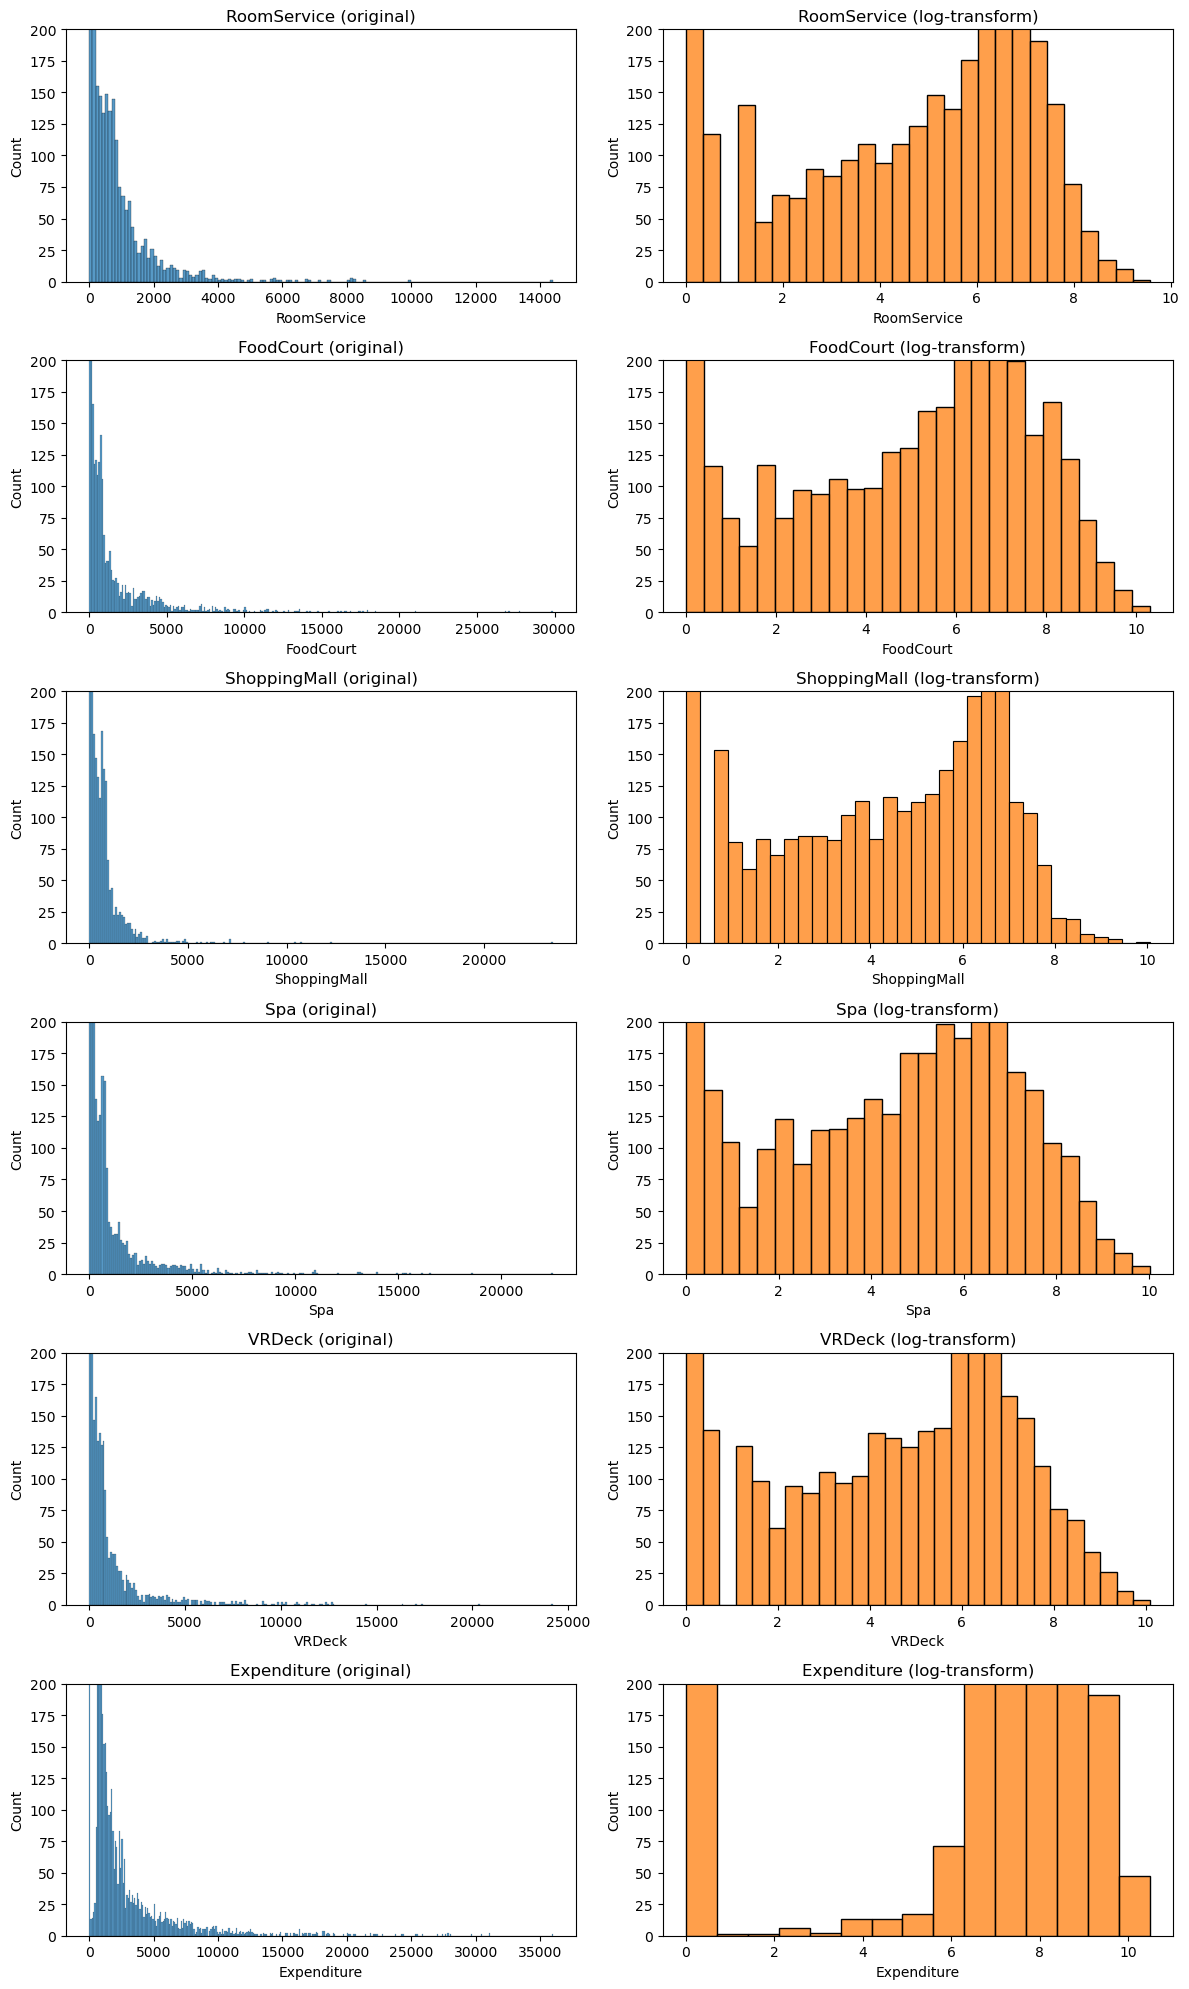

In [61]:
# plot log transform results
fig=plt.figure(figsize=(12,20))
for i, col in enumerate(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Expenditure']):
    plt.subplot(6,2,2*i+1)
    sns.histplot(X[col],binwidth=100)
    plt.ylim([0,200])
    plt.title(f'{col} (original)')
    
    plt.subplot(6,2,2*i+2)
    sns.histplot(np.log(1+X[col]), color='C1')
    plt.ylim([0,200])
    plt.title(f'{col} (log-transform)')
    
fig.tight_layout()
plt.show()

In [62]:
# Apply log transform
for col in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Expenditure']:
    X[col]=np.log(1+X[col])
    X_test[col]=np.log(1+X_test[col])
